# [Open Machine Learning Course. Topic 2: Visual Data Analysis with python](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd)

# 1. Dataset

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

# Disable warnings in Anaconda
import warnings
warnings.simplefilter('ignore')

# We will display plots inside Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# We will use Seaborn
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,...,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,...,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,...,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,...,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,...,8.41,10.1,3,2.73,3,False


## Description of features:
![title](features.png)
## The last column, Churn, is the target variable

# 2. Univariate visualization

## 2.1 Quantitative features

### Histograms and density plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115e24320>,
      dtype=object)

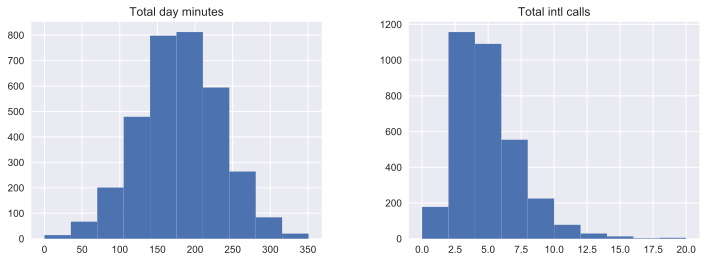

In [3]:
# To look at the distribution of a numerical variable plot its histogram
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(12, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1165da9b0>,
      dtype=object)

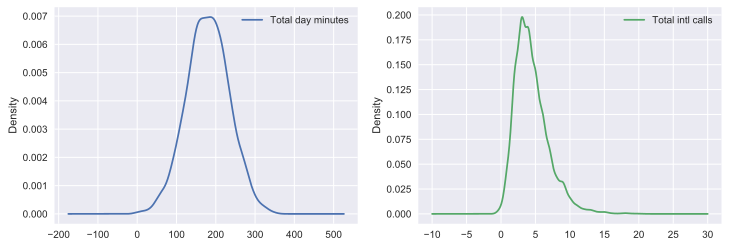

In [4]:
# kernel density plot can be considered a smoothed version of histogram
df[features].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12,4))

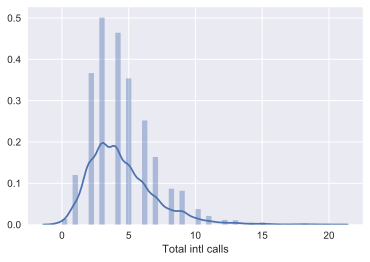

In [5]:
# Can plot a distribution of observations with seaborn's distplot()
sns.distplot(df['Total intl calls'])

### Box Plot

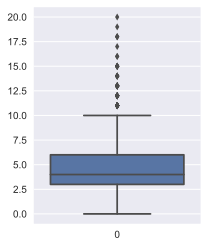

In [6]:
_, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(data=df['Total intl calls'], ax=ax)

* box illustrates the interquartile spread of the distribution
    > length is determined by the 25th (Q1) and 75th (Q3) percentiles
    
    > the vertical line inside the box marks the median (50%) of the distribution
* the whiskers represent the entire scatter of points, specifically the points that fall within the interval (Q1 - 1.5*IQR, Q3 + 1.5*IQR), where IQR = Q3 - Q1 is the interquartile range
* outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis

### Violin Plot

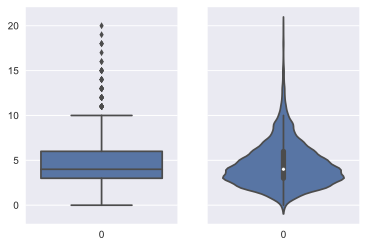

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))

sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

* the box plot illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole
* the violin plot above does not contribute any additional information about the data

### describe()

In [8]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


## 2.2 Categorical and binary features

* Categorical features take on a fixed number of values
* Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this sample
* Binary variables are an important special case of categorical variables when the number of possible values is exactly 2
* if the values of a categorcical variable are ordered, it is called ordinal


### Frequency table

In [9]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [10]:
# ^^^ The data is not balanced as the target classes are not 
# represented equally in the dataset

### Bar Plot

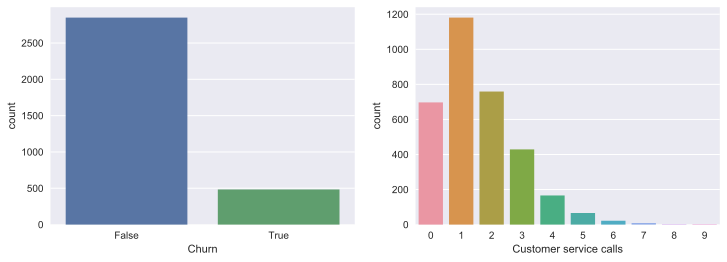

In [11]:
# Bar plot is a graphical representation of the frequency table
# create using seaborn's function countplot()
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

* The left chart vividly illustrates the imbalance in our target variable
* The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in a maximum 2-3 calls

# 3. Multivariate visualization

* Multivariate plots allow us to see relationships between two or more different variables, all in one figure.

## 3.1 Quantitative-Quantitative

### Correlation matrix

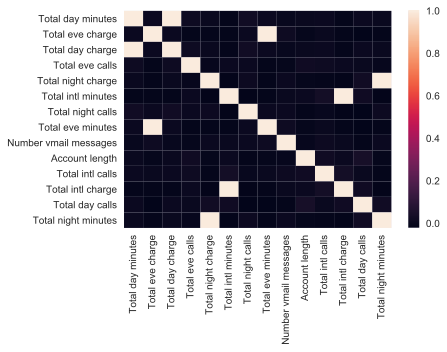

In [12]:
# Drop non-numerical variables
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

* Total charges have been calculated directly from the number of minutes spent on the calls. These are called dependent variables and can be left out since they do not contribute any additional info

In [13]:
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

### Scatter plot

* The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space. Scatter plots in 3D are also possible

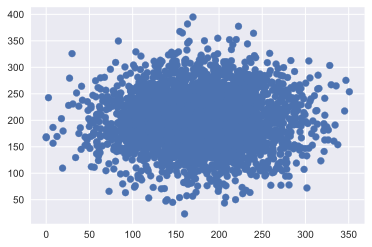

In [14]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

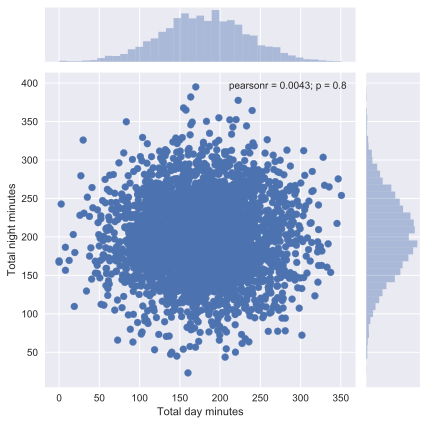

In [15]:
# Using seaborn
sns.jointplot(x='Total day minutes', y='Total night minutes', 
             data=df, kind='scatter')

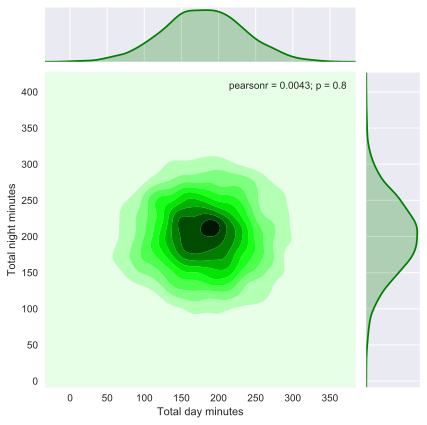

In [16]:
# We can also get a smoothed version
sns.jointplot(x='Total day minutes', y='Total night minutes', 
             data=df, kind='kde', color='g')

### Scatterplot matrix

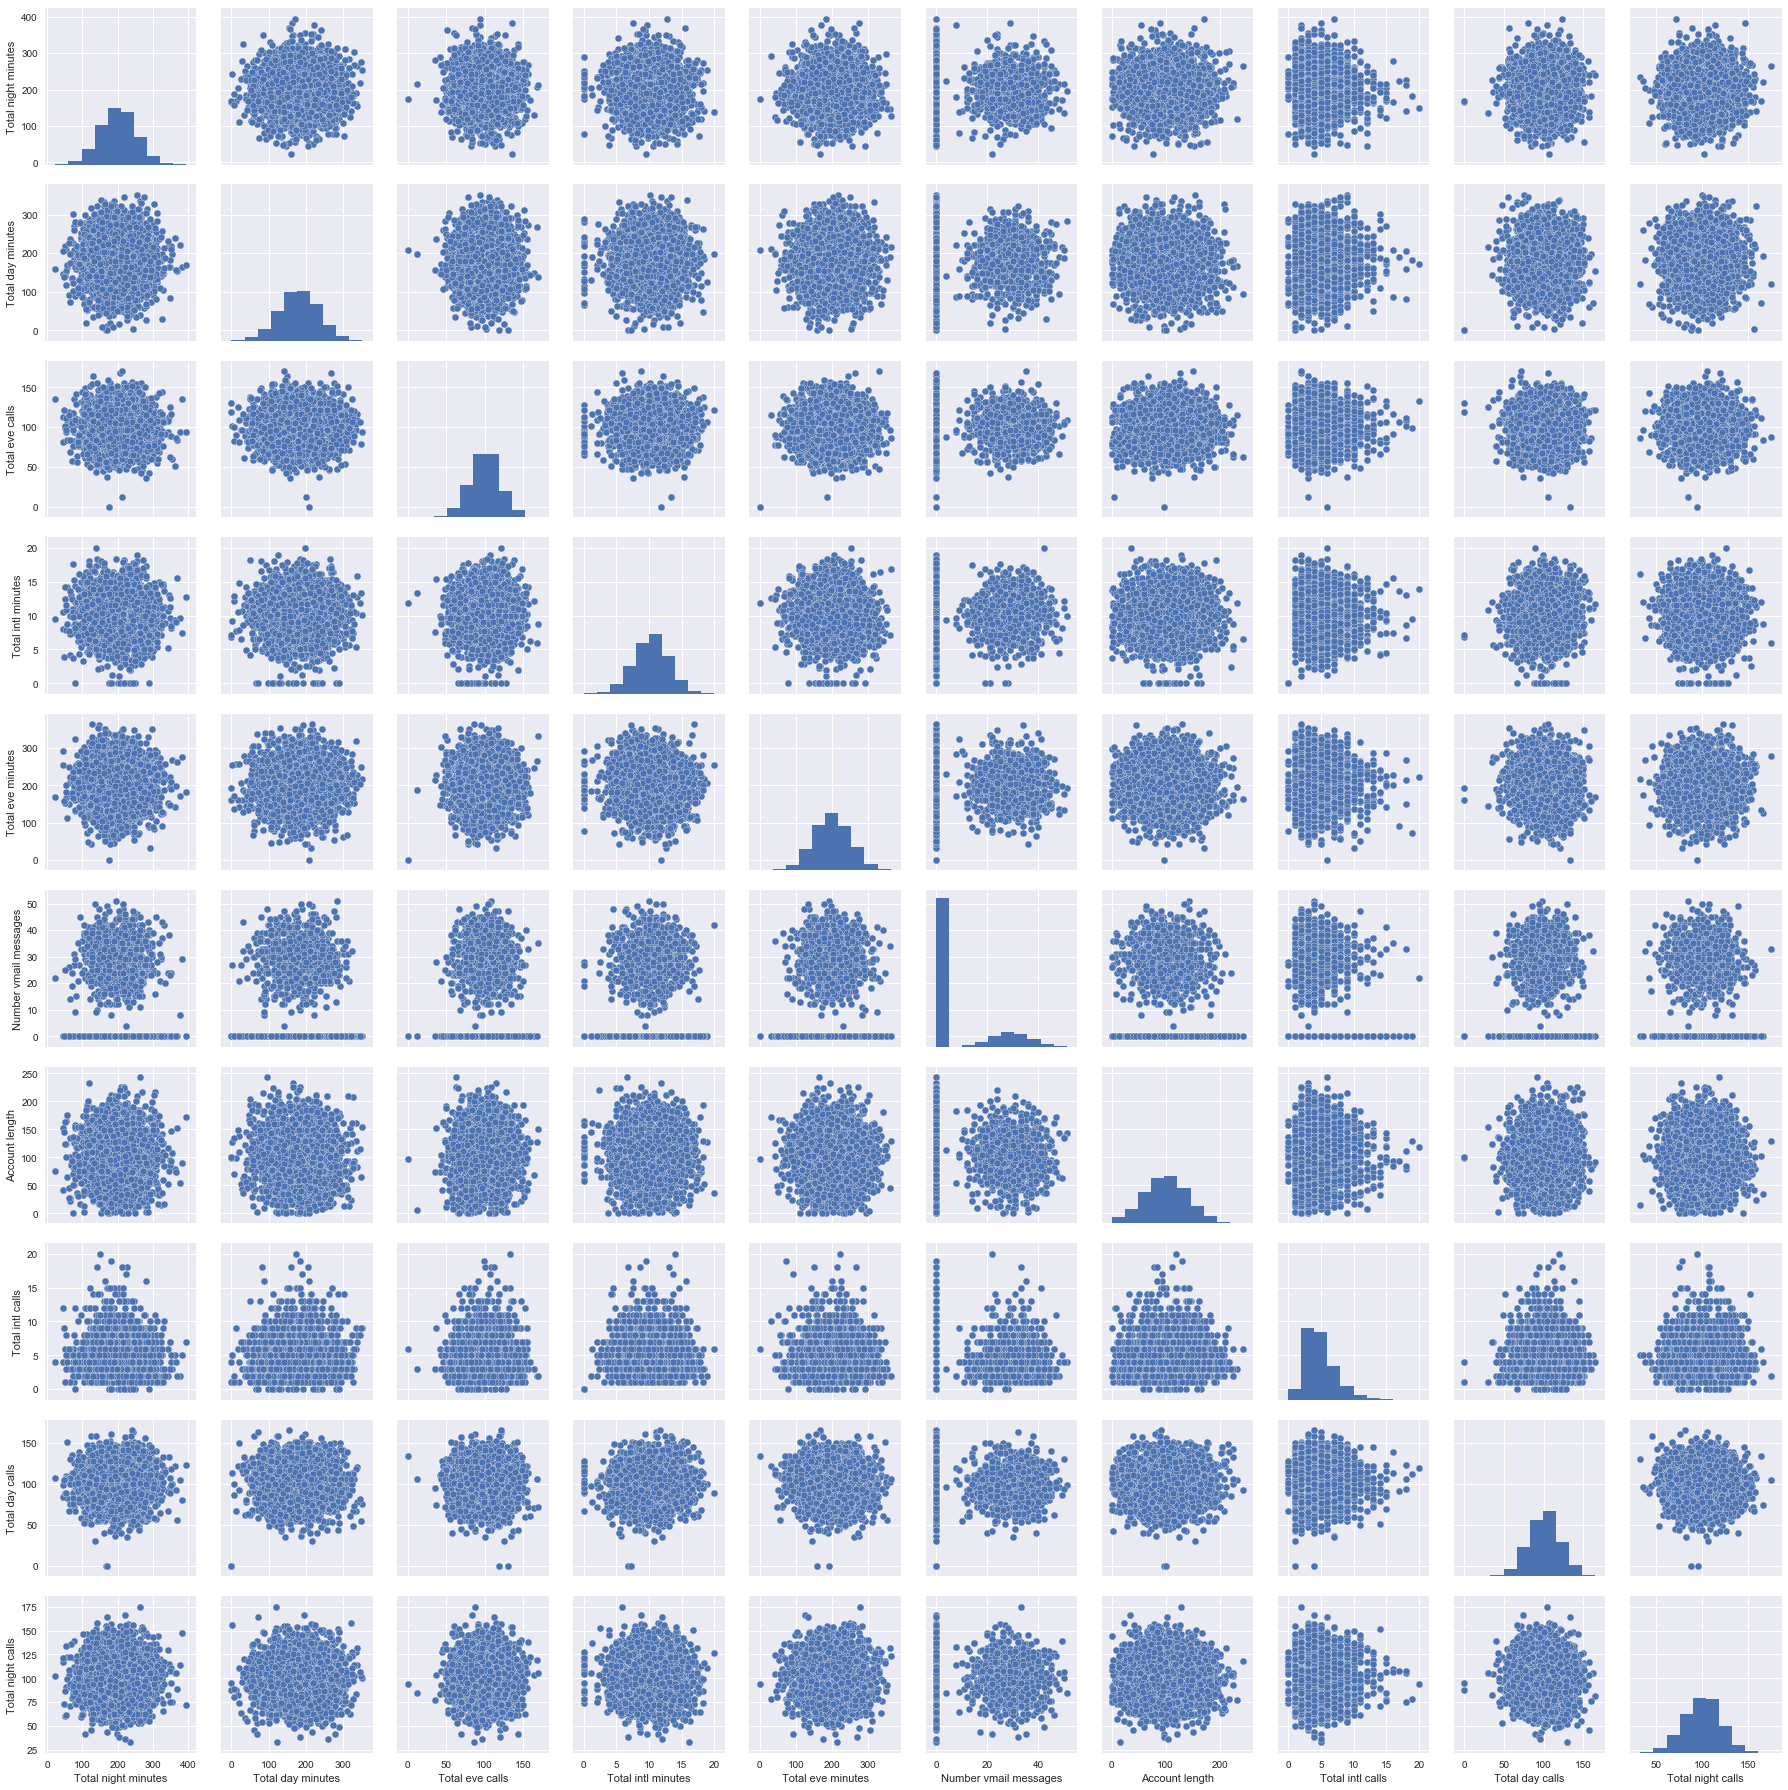

In [17]:
# pairplot may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

* Everything is clear with no surprises

## 3.2 Quantitative-Categorical

* Plot interactions between the numerical and categorical features
* Can add a third categorical variable to a scatter plot using the hue parameter of the lmplot() function

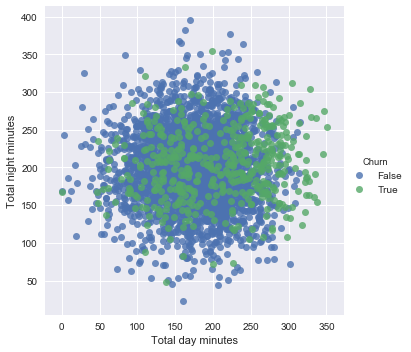

In [18]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df,
          hue='Churn', fit_reg=False)

* Use box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True)

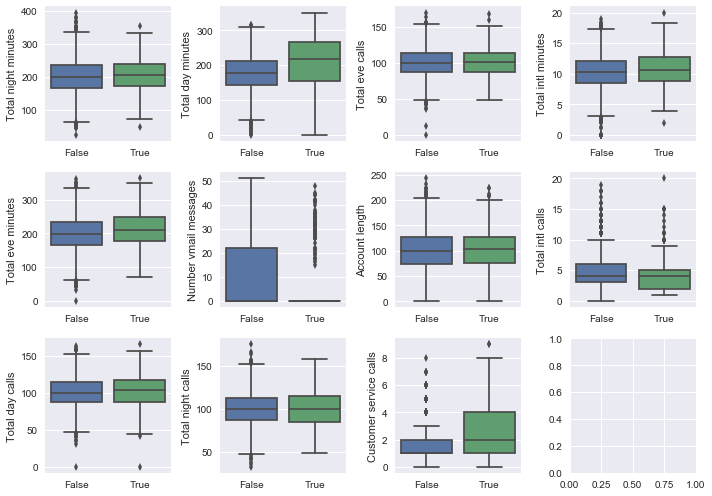

In [19]:
# Sometimes you can analyze an ordinal variable as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))

for idx, feat in enumerate(numerical):
    ax = axes[int(idx /  4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

* From the above, it is clear that the greatest discrepancy in distribution between the two groups is for three variables: Total day minutes, Customer service calls, and Number vmail messages.
* Let's look at the distribution of day minutes spoken fon the loyal and disloyal customers separately. We will create box and violin plots for Total day minutes grouped by the target variable

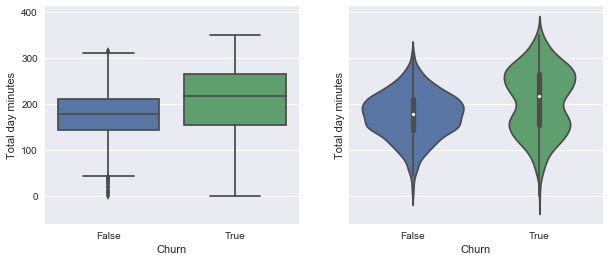

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10,4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

* In this case the violin plot does not contribute any additional information as everything is clear from the box plot alone: disloyal customers tend to talk on the phon more
* When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called factorplot()

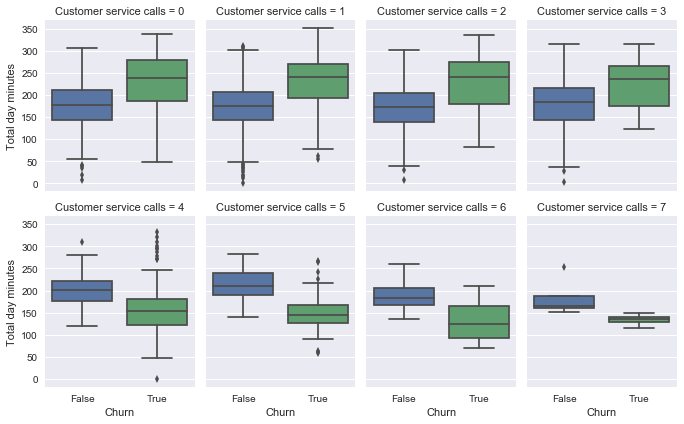

In [21]:
sns.factorplot(x='Churn', y='Total day minutes',
              col='Customer service calls',
              data=df[df['Customer service calls'] < 8],
              kind='box', col_wrap=4, size=3, aspect=.8)

* From the above we could conclude that, starting with 4 calls, Total day minutes may no longer be the main factor for customer churn

## 3.3 Categorical-Categorical

* The variable Customer service calls has few unique values and can be considered either numerical or ordinal
* Let's look at the distribution of calls to the customer service, using a count plot and passing in the parameter hue='Churn' that adds a categorical dimension to the plot

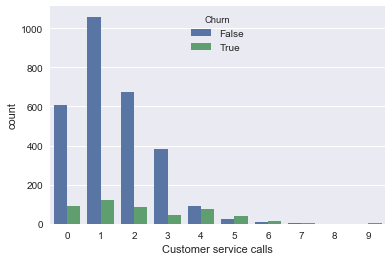

In [22]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

* An observation: the churn rate increases significantly after 4 or more calls to the customer service
* Let's look at the relationship between Churn and the binary features International plan and Voice mail plan

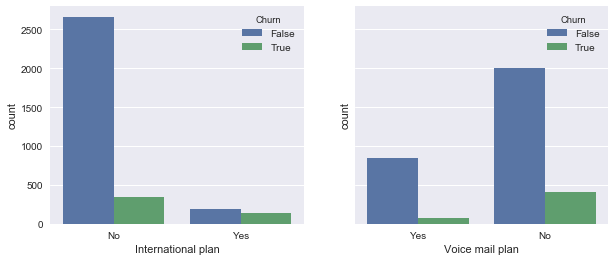

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

* An observation: when International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature

### Contingency table

* A contingency table or cross tabulation represents multivariate frequency distribution of categorical variables in tabular form
* It allows us to see the distribution of one variable conditional on the other by looking along a column or row

In [24]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,...,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,
False,49,72,44,60,25,57,...,72,65,52,71,96,68
True,3,8,11,4,9,9,...,5,8,14,7,10,9


* In the case of State, the number of distinct values is rather high: 51
* We see that there are only a few data points available for each individual state — only 3 to 17 customers in each state abandoned the operator

In [25]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,...,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,...,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


* At first glance, it seems that the churn rate in New Jersey and California are above 25% and less than 6% for Hawaii and Alaska

# 4. Whole Dataset

## 4.1 Naive approach

* We could use hist() or create a scatterplot matrix with pairplot() for the whole dataset to look at all of our features simultaneously.
* But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient.
* Besides, we would still be analyzing our variables in a pairwise fashion, not all at once

## 4.2 Dimensionality reduction

* To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input
* One of the well-known dimensionality reduction methods is Principal Component Analysis (PCA), which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.
* There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is t-SNE.

## 4.3 t-SNE

* t-distributed Stochastic Neighbor Embedding
* Its basic idea is simple: to find a projection for a high-dimensional feature space onto a plane (or a 3D hyperplane, but it is almost always 2D) such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other.
* Essentially, neighbor embedding is a search for a new and less-dimensional data representation that preserves neighborship of examples

In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [27]:
# Convert 'Yes/No' of the binary features into numerical values
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes' : 1, 'No' : 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

In [28]:
# Normalize the data: subtract the mean from each variable
# and divide it by its standard deviation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Build n-SNE representation
%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs


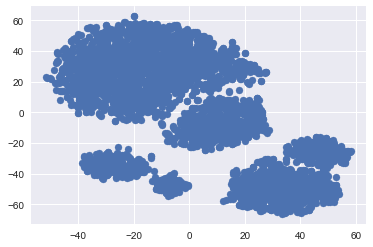

In [32]:
# plot it
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1])

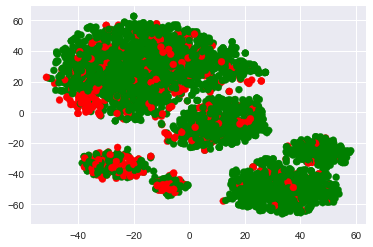

In [33]:
# Color according to the churn (green = loyal)
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
           c=df['Churn'].map({False : 'green', True : 'red'}))

* We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space
* To better understand the picture, we can also color it with the remaining binary features: International plan and Voicemail.
* The green dots indicate the objects that are positive for the corresponding binary feature

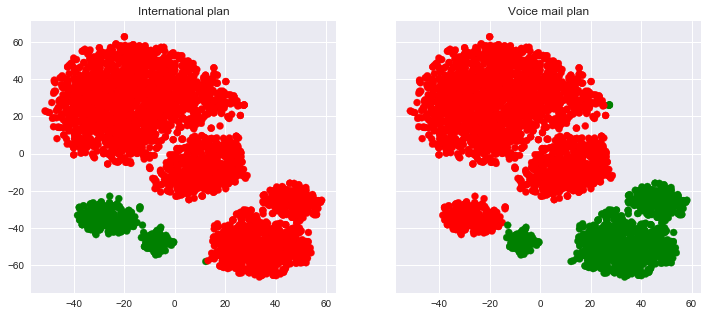

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes' : 'green', 'No' : 'red'}))
    axes[i].set_title(name)

* Now it is clear that, for example, many dissatisfied customers who canceled their subscription are crowded together in the most south-west cluster that represents the people with the international plan but no voice mail.

** Disadvantages of s-SNE **
* High computational complexity. The implementation in scikit-learn is unlikely to be feasible in a real task. If you have a large number of samples, you should try Multicore-TSNE instead
* The plot can change a great deal depending on the random seed, which complicates interpretation. Here is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often